# Bitcoin-Public Trend Association Analysis

## Load Packages

In [240]:
library(corrplot)
library(psych)
library(pastecs)
library(car)
library(tseries)
library(urca)

## Load Data and Organize

In [217]:
r <- read.csv("C:/Users/Michael/Desktop/bitcoin/Bitcoin.csv", header=T, dec=",")

In [218]:
r <- as.data.frame(r)
rr <- data.matrix(r[2:5])
head(rr)

mkt_Price,g_Trends,transactions,SP500
77,2,101390828,16
85,2,102612806,8
49,2,103904344,5
57,2,105350036,2
53,2,106880820,3
50,2,108353021,4


In [219]:
y <- as.numeric(as.character(r$mkt_Price), na.action(r$mkt_Price))
g_Trends <- as.numeric(as.character(r$g_Trends), na.action(r$g_Trends))
transactions <- as.numeric(as.character(r$transactions), na.action(r$transactions))
sp <- as.numeric(as.character(r$SP500), na.action(r$SP500))

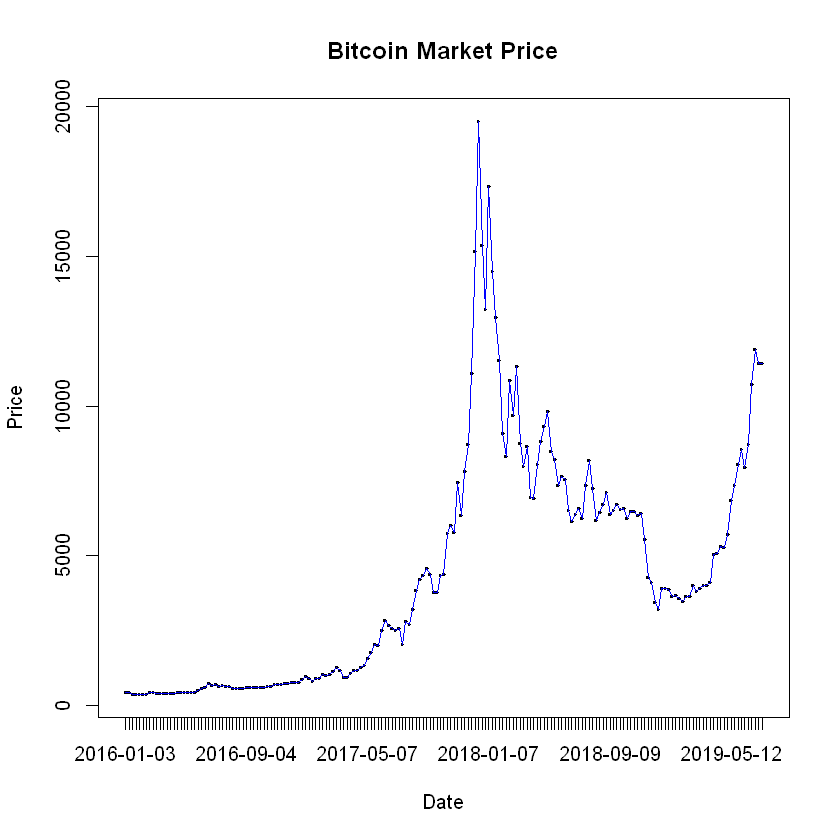

In [220]:
plot(r$Week, y,
     main = "Bitcoin Market Price",
     xlab = "Date",
     ylab = "Price")
lines(y, col = 'blue')

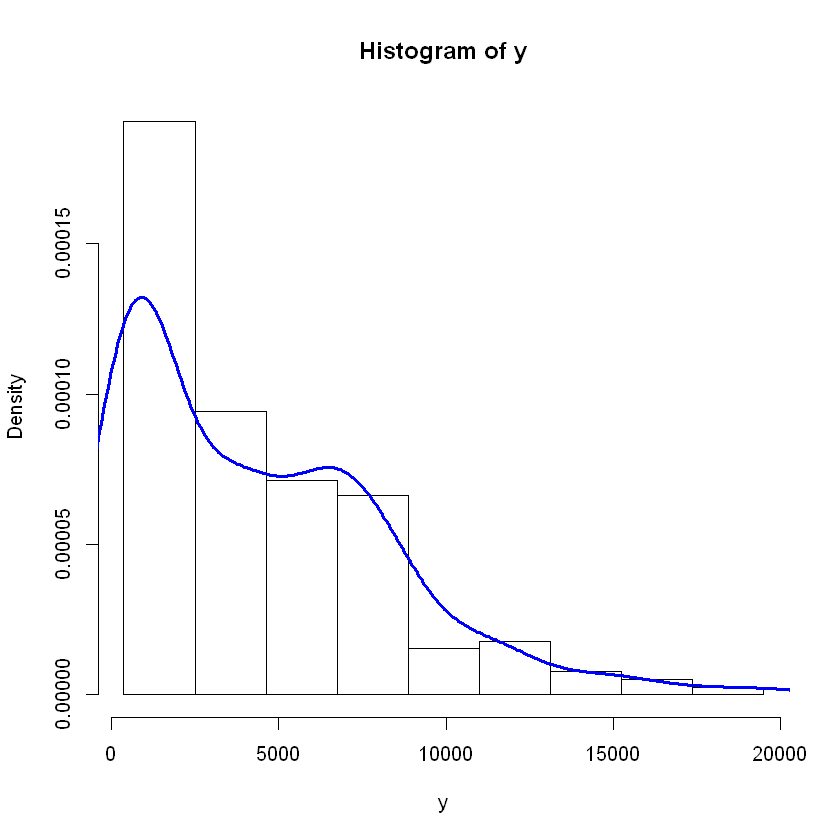

In [221]:
breaks <- seq(from=min(y),
              to=max(y), length=10)
pop_freq <- cut(y, breaks=breaks,
                right=TRUE, include.lowest = TRUE)

hist(y, breaks=breaks, freq=FALSE)
lines(density(y), lwd=3, col="blue")

## Augmented Dicky-Fuller Tests

In [222]:
summary(ur.df(y, type = "trend", lags = 1, selectlags = c("Fixed", "AIC", "BIC")))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3758.2  -227.7   -54.8   108.0  4595.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   4.28627  137.84707   0.031   0.9752  
z.lag.1      -0.04963    0.02328  -2.132   0.0343 *
tt            2.86928    1.69058   1.697   0.0914 .
z.diff.lag    0.06607    0.07476   0.884   0.3780  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 921 on 179 degrees of freedom
Multiple R-squared:  0.02734,	Adjusted R-squared:  0.01104 
F-statistic: 1.677 on 3 and 179 DF,  p-value: 0.1736


Value of test-statistic is: -2.1324 1.81 2.3605 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.07
phi

In [223]:
summary(ur.df(g_Trends, type = "none", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-36.20  -0.42   0.12   1.25  41.62 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1    -0.06001    0.02500  -2.400   0.0174 *
z.diff.lag  0.08022    0.07420   1.081   0.2811  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.936 on 181 degrees of freedom
Multiple R-squared:  0.03323,	Adjusted R-squared:  0.02255 
F-statistic: 3.111 on 2 and 181 DF,  p-value: 0.04695


Value of test-statistic is: -2.4004 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [224]:
summary(ur.df(transactions, type = "none", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-479030  -58206   10638   82876  438824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    0.0001820  0.0001222    1.49    0.138    
z.diff.lag 0.9744040  0.0182714   53.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 144100 on 181 degrees of freedom
Multiple R-squared:  0.994,	Adjusted R-squared:  0.9939 
F-statistic: 1.501e+04 on 2 and 181 DF,  p-value: < 2.2e-16


Value of test-statistic is: 1.49 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [225]:
summary(ur.df(sp, type = "none", lags = 1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-170.521  -11.972    1.561   19.411   81.896 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    0.001664   0.001023   1.627  0.10554   
z.diff.lag 0.206148   0.071606   2.879  0.00447 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.25 on 181 degrees of freedom
Multiple R-squared:  0.06512,	Adjusted R-squared:  0.05479 
F-statistic: 6.304 on 2 and 181 DF,  p-value: 0.002257


Value of test-statistic is: 1.6267 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


## Co-Integration Test

In [226]:
# Perform Johansen's Co-Integration longrun test
jotest <- ca.jo(data.frame(y, g_Trends, transactions, sp), type = "trace", K=2, spec = "longrun")
summary(jotest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.20372032 0.10537058 0.08051568 0.01065121

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  1.96  6.50  8.18 11.65
r <= 2 | 17.32 15.66 17.95 23.52
r <= 1 | 37.70 28.71 31.52 37.22
r = 0  | 79.39 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                         y.l2   g_Trends.l2 transactions.l2        sp.l2
y.l2             1.000000e+00  1.000000e+00    1.0000000000 1.000000e+00
g_Trends.l2     -2.184263e+02  1.107575e+02   -7.1332587593 1.846422e+01
transactions.l2 -1.361017e-05  7.911860e-05   -0.0003009878 6.175906e-05
sp.l2           -3.324314e+00 -3.792399e+01   78.0669486383 4.049249e+00

Weights W:
(This is the loading matrix)

                        y.l2   g_Trends.l2 transactions.l2         sp.l2
y.d            -2.29592

## Correlation Analysis 

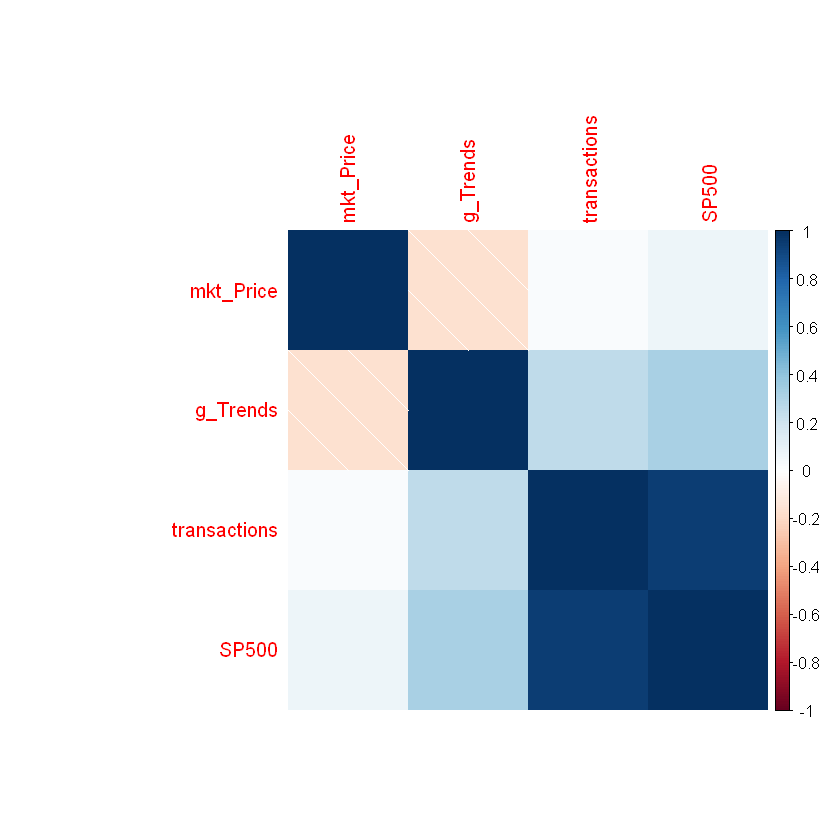

In [227]:
rr <- cor(rr)
corrplot(rr, method = "shade")

In [239]:
cor.test(g_Trends, y, method = "pearson")


	Pearson's product-moment correlation

data:  g_Trends and y
t = 14.768, df = 183, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6637460 0.7968944
sample estimates:
      cor 
0.7374027 


In [237]:
cor.test(g_Trends, y, method = "kendall")


	Kendall's rank correlation tau

data:  g_Trends and y
z = 13.973, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.7179873 
